# First Inspection of the Data Sets


In [16]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np



### 1. Elon Musk Twitter Data

In [17]:
musk_twitter_data = pd.read_csv(os.path.join('Data', 'all_musk_posts.csv'))

C:\Users\malte\AppData\Local\Temp\ipykernel_33712\2111901614.py:1: DtypeWarning: Columns (11,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  musk_twitter_data = pd.read_csv(os.path.join('Data', 'all_musk_posts.csv'))


In [18]:
musk_twitter_data.head()
musk_twitter_data['createdAt'] = pd.to_datetime(musk_twitter_data['createdAt'])


In [19]:
musk_twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55099 entries, 0 to 55098
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   id                        55099 non-null  int64              
 1   url                       55099 non-null  object             
 2   twitterUrl                55099 non-null  object             
 3   fullText                  55099 non-null  object             
 4   retweetCount              55009 non-null  float64            
 5   replyCount                54297 non-null  float64            
 6   likeCount                 55009 non-null  float64            
 7   quoteCount                54271 non-null  float64            
 8   viewCount                 34455 non-null  float64            
 9   createdAt                 55099 non-null  datetime64[ns, UTC]
 10  bookmarkCount             54271 non-null  float64            
 11  isReply        

In [20]:
musk_twitter_data.describe()

,id,retweetCount,replyCount,likeCount,quoteCount,viewCount,bookmarkCount,inReplyToId,conversationId,inReplyToUserId,quoteId
count,5.509900e+04,55009.000000,54297.000000,5.500900e+04,54271.000000,3.445500e+04,54271.000000,3.949700e+04,5.429700e+04,3.952100e+04,7.541000e+03
mean,1.565238e+18,5152.859841,2375.592685,4.154156e+04,485.358442,8.839065e+06,810.181478,1.572386e+18,1.574776e+18,4.650182e+17,1.790196e+18
std,3.538849e+17,14041.809886,6747.502876,1.064703e+05,3075.282293,1.879434e+07,3479.675005,3.104468e+17,3.446097e+17,6.253846e+17,2.077654e+17
min,1.543473e+10,0.000000,0.000000,0.000000e+00,0.000000,1.000000e+00,0.000000,1.659576e+09,1.659576e+09,1.200000e+01,1.659601e+09
25%,1.402685e+18,80.000000,102.000000,1.351000e+03,8.000000,6.829150e+04,12.000000,1.419324e+18,1.419782e+18,4.419640e+07,1.806650e+18
50%,1.687677e+18,276.000000,271.000000,4.198000e+03,29.000000,2.489050e+05,32.000000,1.672634e+18,1.691963e+18,9.401079e+08,1.855711e+18
75%,1.832968e+18,2608.000000,1478.000000,2.858800e+04,205.000000,8.024403e+06,180.500000,1.805232e+18,1.834187e+18,1.106321e+18,1.886091e+18
max,1.911532e+18,610842.000000,357538.000000,4.372808e+06,439431.000000,6.071525e+08,161373.000000,1.906943e+18,1.911532e+18,1.901635e+18,1.911425e+18


C:\Users\malte\AppData\Local\Temp\ipykernel_33712\3481351168.py:3: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  musk_twitter_data['month'] = musk_twitter_data['createdAt'].dt.to_period('M')


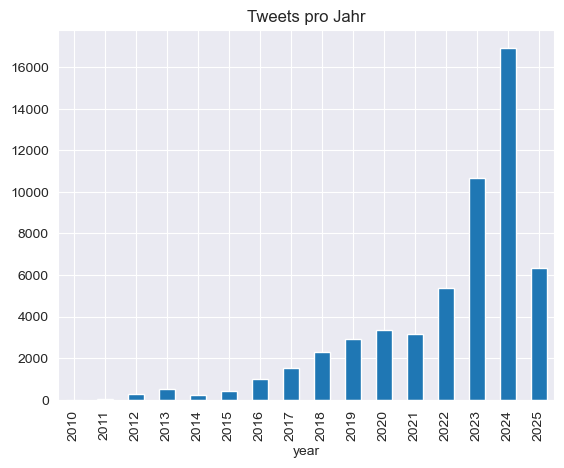

In [21]:
musk_twitter_data['createdAt'] = pd.to_datetime(musk_twitter_data['createdAt'])
musk_twitter_data['year'] = musk_twitter_data['createdAt'].dt.year
musk_twitter_data['month'] = musk_twitter_data['createdAt'].dt.to_period('M')
musk_twitter_data['day'] = musk_twitter_data['createdAt'].dt.date

tweets_per_year = musk_twitter_data.groupby('year').size()
tweets_per_month = musk_twitter_data.groupby('month').size()

tweets_per_year.plot(kind='bar', title='Tweets pro Jahr')
plt.show()

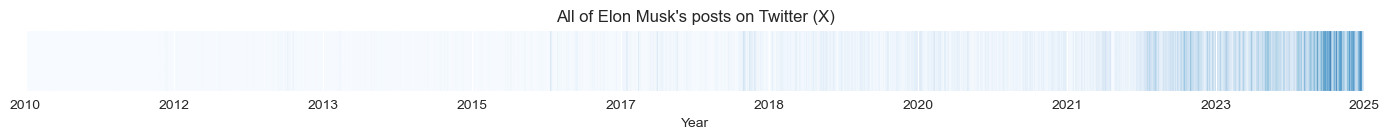

In [22]:
# Datum vorbereiten
musk_twitter_data['createdAt_date'] = musk_twitter_data['createdAt'].dt.date

# Tägliche Counts
tweets_per_day = musk_twitter_data.groupby('createdAt_date').size()

# Lücke schließen: alle Tage im Zeitraum
all_days = pd.date_range(start=tweets_per_day.index.min(), end=tweets_per_day.index.max())
tweets_per_day = tweets_per_day.reindex(all_days, fill_value=0)

# Normieren (0–1 für Farbintensität)
normed = (tweets_per_day - tweets_per_day.min()) / (tweets_per_day.max() - tweets_per_day.min())

# 1D Heatmap als horizontales Streifenbild
fig, ax = plt.subplots(figsize=(14, 1.5))
ax.imshow(normed.values[np.newaxis, :], aspect="auto", cmap="Blues")

# Achsen stylen
ax.set_yticks([])
ax.set_xticks(np.linspace(0, len(normed)-1, 10).astype(int))
ax.set_xticklabels([pd.to_datetime(normed.index[i]).year for i in np.linspace(0, len(normed)-1, 10).astype(int)])
ax.set_title("All of Elon Musk's posts on Twitter (X)")
ax.set_xlabel('Year')
plt.tight_layout()
plt.show()

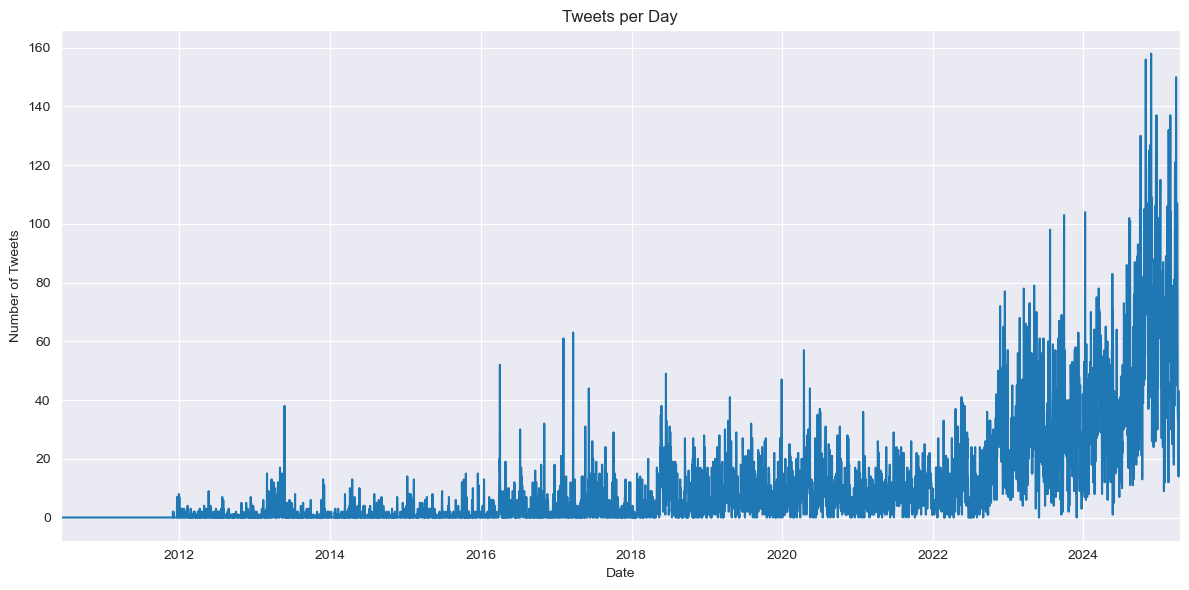

In [23]:
# Plot
plt.figure(figsize=(12, 6))
tweets_per_day.plot(kind='line')
plt.title('Tweets per Day')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
# Tage ohne Tweets zählen
days_without_tweets = (tweets_per_day == 0).sum()
print(f"Number of days without tweets: {days_without_tweets}")

Number of days without tweets: 1975


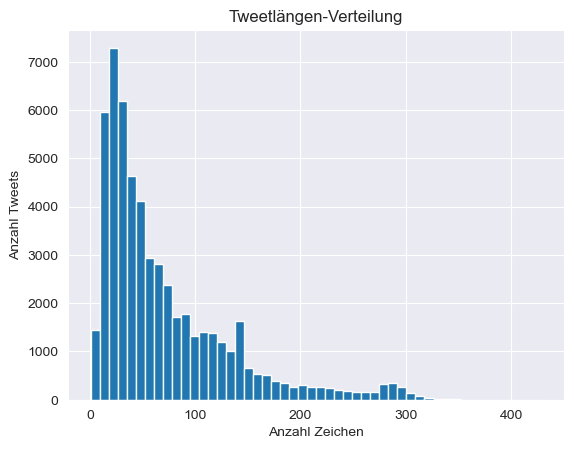

In [25]:
musk_twitter_data['textLength'] = musk_twitter_data['fullText'].str.len()
musk_twitter_data['textLength'].hist(bins=50)
plt.title('Tweetlängen-Verteilung')
plt.xlabel('Anzahl Zeichen')
plt.ylabel('Anzahl Tweets')
plt.show()

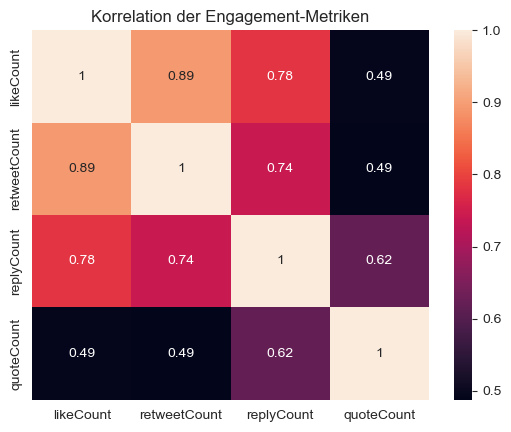

In [26]:
musk_twitter_data[['likeCount', 'retweetCount', 'replyCount', 'quoteCount']].describe()

# Korrelationsmatrix
sns.heatmap(musk_twitter_data[['likeCount', 'retweetCount', 'replyCount', 'quoteCount']].corr(), annot=True)
plt.title("Korrelation der Engagement-Metriken")
plt.show()

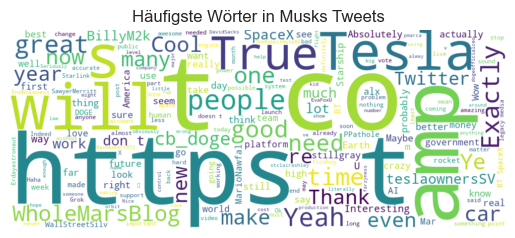

In [27]:
from wordcloud import WordCloud
text = " ".join(musk_twitter_data['fullText'])
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Häufigste Wörter in Musks Tweets")
plt.show()

Results: 
- The Dataset contains 55099 Tweets from 06/2010 - 04/2025
- There are no breaks in the data

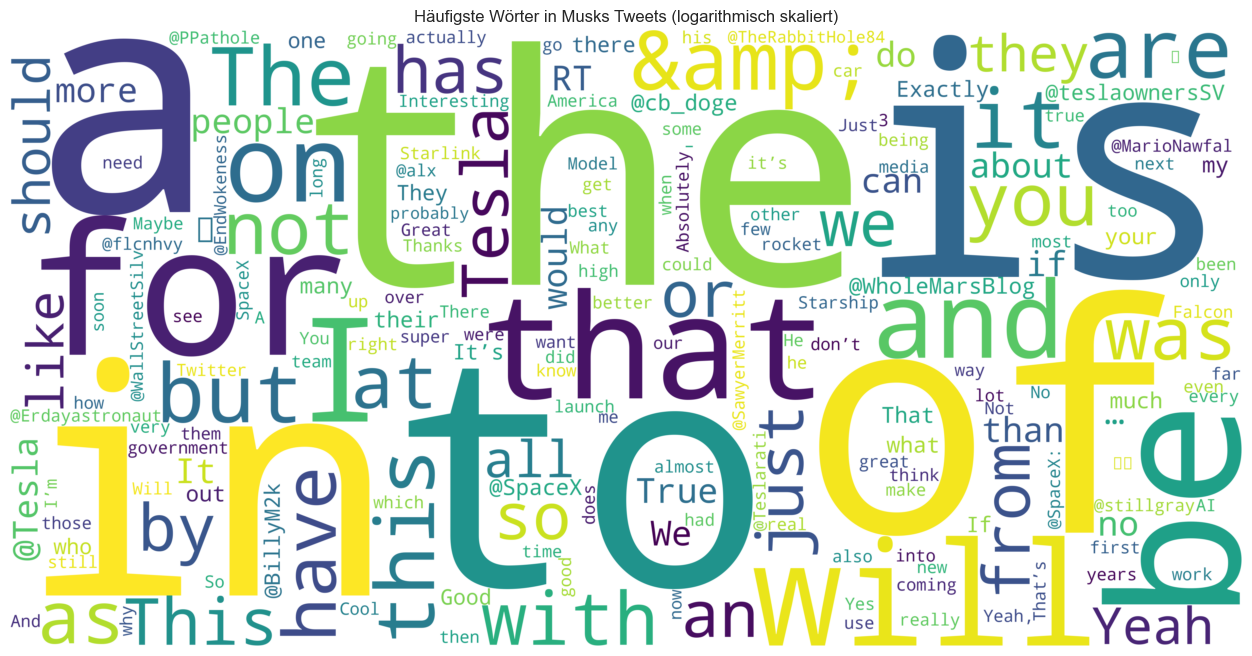

In [28]:
import numpy as np
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Schritt 1: Text in Tokens zerlegen
tokens = " ".join(musk_twitter_data['fullText']).split()

# Schritt 2: Wortfrequenzen berechnen
word_freq = Counter(tokens)

# Schritt 3: Logarithmisch skalieren (optional mit +1 zum Schutz vor log(0))
log_scaled_freq = {word: np.log(np.log(count + 2) + 1) for word, count in word_freq.items()}

# Schritt 4: WordCloud aus log-skalierten Frequenzen erstellen
wordcloud = WordCloud(width=5000, height=2500, background_color='white').generate_from_frequencies(log_scaled_freq)

# Schritt 5: Plot
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Häufigste Wörter in Musks Tweets (logarithmisch skaliert)")
plt.show()

In [29]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# Falls noch nicht geschehen:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Optional: Eigene zusätzliche Stopwords (wie "https", "co")
custom_stopwords = stop_words.union({"https", "http", "co", "amp"})

# Beispiel-Funktion zum Reinigen
def clean_text(text):
    # Lowercase
    text = text.lower()
    
    # Entferne URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Entferne Erwähnungen und Hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    
    # Entferne Sonderzeichen, Zahlen und überflüssige Leerzeichen
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenisieren & Stopwords entfernen
    tokens = text.split()
    tokens = [word for word in tokens if word not in custom_stopwords]
    
    # Optional: wieder zusammensetzen
    return ' '.join(tokens)

# Wende es auf die Spalte an
musk_twitter_data['cleanedText'] = musk_twitter_data['fullText'].astype(str).apply(clean_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\malte\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


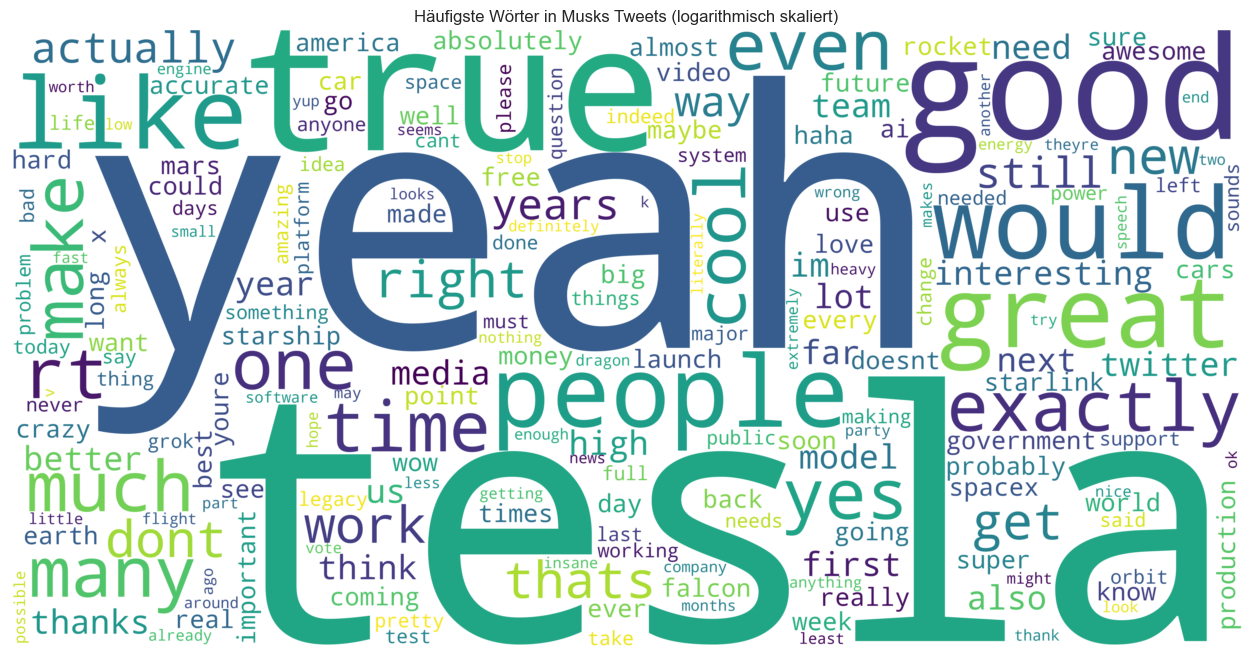

In [30]:
import numpy as np
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Schritt 1: Text in Tokens zerlegen
tokens = " ".join(musk_twitter_data['cleanedText']).split()

# Schritt 2: Wortfrequenzen berechnen
word_freq = Counter(tokens)

# Schritt 3: Logarithmisch skalieren (optional mit +1 zum Schutz vor log(0))
log_scaled_freq = {word: np.log(np.log(count + 2) + 1) for word, count in word_freq.items()}

# Schritt 4: WordCloud aus log-skalierten Frequenzen erstellen
wordcloud = WordCloud(width=5000, height=2500, background_color='white').generate_from_frequencies(log_scaled_freq)

# Schritt 5: Plot
plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Häufigste Wörter in Musks Tweets (logarithmisch skaliert)")
plt.show()
